<a href="https://colab.research.google.com/github/RafaRomero8/Kera-Regresion-Lineal/blob/main/Keras_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#modulos de keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lectura y visualización del set de datos
datos = pd.read_csv('/content/dataset.csv', sep=",", skiprows=32, usecols=[2,3])
print(datos)

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


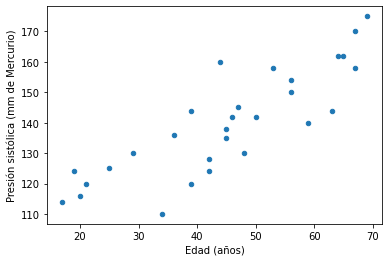

In [ ]:
# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [ ]:

# Construir el modelo en Keras

# - Capa de entrada: 1 dato (cada dato "x" correspondiente a la edad)
# - Capa de salida: 1 dato (cada dato "y" correspondiente a la regresión lineal)
# - Activación: 'linear' (pues se está implementando la regresión lineal)
np.random.seed(2)			# Para reproducibilidad del entrenamiento

input_dim = 1
output_dim = 1
modelo = Sequential() #crea un objeto
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
#dense requiere parametros como la dimensión de los datos(output_dim) al igual que input_dim #y nuestra funcion de activación que es linear

In [ ]:
# Definición del método de optimización (gradiente descendiente), con una
# tasa de aprendizaje de 0.0004 y una pérdida igual al error cuadrático
# medio para minimizar el error(mse)

sgd = SGD(lr=0.0004)#gradiente descendiente con una tasa
modelo.compile(loss='mse', optimizer=sgd)

# Imprimir en pantalla la información del modelo
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Entrenamiento: realizar la regresión lineal

# 40000 iteraciones y todos los datos de entrenamiento (29) se usarán en cada
# iteración (batch_size = 29)

num_epochs = 40000
batch_size = x.shape[0]#en cada una de las iteraciones de los datos que tenemos 
#cuantos realmente vamos a utilizar para calcular,es decir le indicamos todos los datos
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)#entrenamos los datos


In [ ]:
# Visualizar resultados del entrenamiento
# Imprimir los coeficientes "w" y "b"
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 1.0, b = 94.6


1/1 [==============================] - 0s 30ms/step


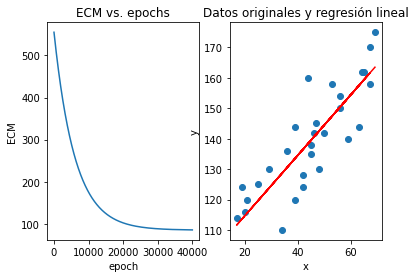

In [ ]:
# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

#en la gráfica del lado izquierdo vemos que a medida que avanza el entrenamiento el error se va haciendo mas pequeño
#y la gráfica derecha vemos que los datos se ajusta bien al modelo a la  linea roja

In [ ]:
# Predicción
#hacemos una predicción para una persona de 90
#¿Cuál será su presion sanguinea?
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

1/1 [==============================] - 0s 39ms/step
La presión sanguínea será de 184.5 mm-Hg  para una persona de 90 años
